# Project Description

Customer segmentation analysis for car insurance: Analyzing customer
data to identify different groups of customers based on their driving
behaviors, demographics, and other factors, accurately determine
whether customers of an insurance company are likely to file an 
insurance claim within the next three(3) months.

Ultimately, the project's goal is to provide a reliable predictive
model that can help them make informed decisions about customer 
risk management and improve their overall business operations.

In [1]:
#Importing all neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

print("All Libraries imported successfully")

All Libraries imported successfully


Importing datasets

In [2]:
#file 1
train_df = pd.read_csv("Train.csv")
#file 2
test_df = pd.read_csv("Test.csv")

display(train_df, test_df)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,ID_ZTTHC5X,2010-12-05,2011-12-04,Male,67,2010-12-05,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic
1198,ID_ZUJAFUP,2010-01-14,2011-01-13,Male,43,2010-01-14,1,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic
1199,ID_ZWHCTUM,2010-07-26,2011-07-25,Male,30,2010-07-26,1,Truck,White,Iveco,Victoria Island,Lagos,CVTP
1200,ID_ZWQRL8L,2010-02-16,2011-02-15,Male,44,2010-02-16,2,Saloon,NaN,Nissan,Aba North,Aba-North,Car Classic


In [3]:
#Concating the two datasets
df = pd.concat([train_df, test_df], ignore_index= True)
df

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13276,ID_ZTTHC5X,2010-12-05,2011-12-04,Male,67,2010-12-05,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic,NaN
13277,ID_ZUJAFUP,2010-01-14,2011-01-13,Male,43,2010-01-14,1,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic,NaN
13278,ID_ZWHCTUM,2010-07-26,2011-07-25,Male,30,2010-07-26,1,Truck,White,Iveco,Victoria Island,Lagos,CVTP,NaN
13279,ID_ZWQRL8L,2010-02-16,2011-02-15,Male,44,2010-02-16,2,Saloon,NaN,Nissan,Aba North,Aba-North,Car Classic,NaN


Inspecting data

In [4]:
#Inspecting d structure & properties of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13281 non-null  object 
 1   Policy Start Date       13281 non-null  object 
 2   Policy End Date         13281 non-null  object 
 3   Gender                  12881 non-null  object 
 4   Age                     13281 non-null  int64  
 5   First Transaction Date  13281 non-null  object 
 6   No_Pol                  13281 non-null  int64  
 7   Car_Category            9171 non-null   object 
 8   Subject_Car_Colour      5622 non-null   object 
 9   Subject_Car_Make        10557 non-null  object 
 10  LGA_Name                6149 non-null   object 
 11  State                   6137 non-null   object 
 12  ProductName             13281 non-null  object 
 13  target                  12079 non-null  float64
dtypes: float64(1), int64(2), object(11)
me

In [5]:
#to check for the numeric value of missing values per column
df.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     400
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              4110
Subject_Car_Colour        7659
Subject_Car_Make          2724
LGA_Name                  7132
State                     7144
ProductName                  0
target                    1202
dtype: int64

Since we have observed our columns, we can now group them into three set: 
Numerical cols, categorical cols and date cols.
This is to make my work neater and readable,to know if a change is to be done on numerical columns or
subsetting my data, it much easier working in them once

In [6]:
# using list comprehension
date_cols = [col for col in df if "Date" in col]
print(date_cols)
print("\n")
num_cols = ["Age", "No_Pol"]
print(num_cols)
print("\n")
cat_cols = [col for col in df.columns if col not in date_cols + num_cols + ["ID","target"]]
print(cat_cols)

['Policy Start Date', 'Policy End Date', 'First Transaction Date']


['Age', 'No_Pol']


['Gender', 'Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']


In [7]:
#Inspecting our dataset for datatypes

df.dtypes

ID                         object
Policy Start Date          object
Policy End Date            object
Gender                     object
Age                         int64
First Transaction Date     object
No_Pol                      int64
Car_Category               object
Subject_Car_Colour         object
Subject_Car_Make           object
LGA_Name                   object
State                      object
ProductName                object
target                    float64
dtype: object

In [8]:
#Observing the inspection above, the columns' datatypes needs to be
#changed to it's specific datatypes("int","date_time","categorical")

Changing date_cols to it's datatype(datetime)

In [9]:
for col in date_cols:
    df[col]= pd.to_datetime(df[col])
df[date_cols].dtypes

Policy Start Date         datetime64[ns]
Policy End Date           datetime64[ns]
First Transaction Date    datetime64[ns]
dtype: object

Changing num_cols to it's datatype(int)

In [10]:
for col in num_cols:
    df[col]= pd.factorize(df[col])[0]
    
df[num_cols].dtypes

Age       int64
No_Pol    int64
dtype: object

Changing cat_cols to it's datatype(category)

In [11]:
for col in cat_cols:
    df[col]=df[col].astype('category')
df[cat_cols].dtypes

Gender                category
Car_Category          category
Subject_Car_Colour    category
Subject_Car_Make      category
LGA_Name              category
State                 category
ProductName           category
dtype: object

In [12]:
#confirming the the changed datatypes
df.dtypes

ID                                object
Policy Start Date         datetime64[ns]
Policy End Date           datetime64[ns]
Gender                          category
Age                                int64
First Transaction Date    datetime64[ns]
No_Pol                             int64
Car_Category                    category
Subject_Car_Colour              category
Subject_Car_Make                category
LGA_Name                        category
State                           category
ProductName                     category
target                           float64
dtype: object

# Cleaning the dataset

In [13]:
# Gender
df.Gender.unique() #inspecting for mislabelled values

['Male', 'Female', 'Entity', 'Joint Gender', NaN, 'NO GENDER', 'NOT STATED', 'SEX']
Categories (7, object): ['Entity', 'Female', 'Joint Gender', 'Male', 'NO GENDER', 'NOT STATED', 'SEX']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


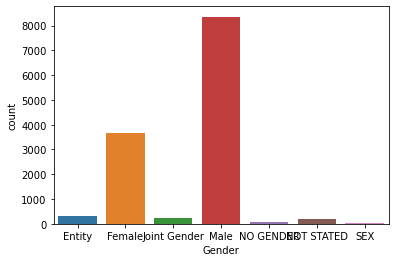

In [14]:
#Graphical representation to view mislabelled values' number of occurence
sns.countplot(df['Gender']);

In [15]:
#replacing the mislabelld gender categories
df["Gender"]= df["Gender"].replace({"Entity":"Others",
                                    "Joint Gender":"Others",
                                   "NO GENDER":"Others",
                                   "NOT STATED":"Others",
                                   "SEX":"Others"})

In [16]:
#to fill the missing value
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Gender'].isna().sum()

0

In [17]:
#to re-inspect the "Gender" column
df["Gender"].unique()

['Male', 'Female', 'Others']
Categories (3, object): ['Others', 'Female', 'Male']

In [18]:
# Age
df["Age"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109], dtype=int64)

In [19]:
for x in df.Age:
    if abs(x) < 18 or abs(x) > 93:
        df['Age'] = df['Age'].replace(x, np.nan)
        
df.Age.unique()
#"abs" stands for "absolute vale", it returns the absolute value of a number
# in this code,If the absolute value of an age value falls outside of this range(18,93)
#the code replaces that value with np.nan (which stands for "not a number")

array([nan, 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93.])

In [20]:
for x in df.Age:
    if x < 0:
        df['Age'] = df['Age'].replace(x, abs(x))   
        
df.Age.unique()
#in this line,I am using a for loop to iterate through the 
#age column and select ages that are negative and replacing 
#them with their positive values(i.e "abs")

array([nan, 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93.])

In [21]:
#In order to get a fair and clean dataset , I need to replace all misssing values with the mean of the age column 
#but the mean value can't be calculated with all the missing values because that will give an inaccurate result.
#using the "loc" function I located missing values and solved for mean with the rest of the values 
age_mean = int(df['Age'].loc[df['Age'].isnull() == False].mean())
age_mean

34

In [22]:
#replacing the missing values with the mean(42)
df.Age = df.Age.fillna(age_mean)
df.Age = df.Age.astype(int) #converting the mean to integer as it has float(decimal) datatype
df.Age.unique()

array([34, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93])

In [23]:
# Car_Category

df.Car_Category.unique()

['Saloon', 'JEEP', NaN, 'Motorcycle', 'Truck', ..., 'Wagon', 'Shape Of Vehicle Chasis', 'Sedan', 'Station 4 Wheel', 'Tipper Truck']
Length: 17
Categories (16, object): ['Bus', 'CAMRY CAR HIRE', 'JEEP', 'Mini Bus', ..., 'Tipper Truck', 'Truck', 'Van', 'Wagon']

In [24]:
#replacing the mislabelld categories
carmap = {'JEEP':'Jeep', 'Pick Up > 3 Tons':'Pick Up',
          'Station 4 Wheel':'Truck',
        'Tipper Truck':'Truck', "Mini Bus":"Bus",
        "Mini Van":"Van", "CAMRY CAR HIRE":'Saloon',
        "Shape Of Vehicle Chasis":np.nan}
df["Car_Category"] = df["Car_Category"].replace(carmap)

In [25]:
#to check for the corrected categories
df.Car_Category.unique()

['Saloon', 'Jeep', NaN, 'Motorcycle', 'Truck', 'Bus', 'Pick Up', 'Van', 'Wagon', 'Sedan']
Categories (9, object): ['Bus', 'Jeep', 'Motorcycle', 'Pick Up', ..., 'Sedan', 'Truck', 'Van', 'Wagon']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


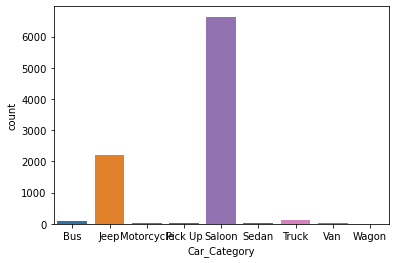

In [26]:
sns.countplot(df['Car_Category']);

In [27]:
#to inspect for missing values
df['Car_Category'].isna().sum()

4116

In [28]:
#to fill the missing values
df['Car_Category'] = df['Car_Category'].fillna(df['Car_Category'].mode()[0])

In [29]:
#to inspect for missing values again
df['Car_Category'].isna().sum()

0

In [30]:
#Subject_Car_Colour Column.


car_color_map = {'Black & Orange':'Black', 'Black & White':'Black','As Attached': 'Black', 'Ash':'Grey',
                'Gray & Gray':'Grey','Gray & Silver':'Grey', 'Dark Grey':'Grey', 'Dark Gray':'Grey', 'Light Gray':'Grey',
                'Wine':'Red','Red & Blue':'Red','Red & Yellow':'Red','Red & White':'Red','Red & Black':'Red','D. Red':'Red',
                'Dark Red':'Red','Burgundy':'Red','Red Maroon':'Red','Blue & Red':'Blue','Light Blue':'Blue','Blue&White&Red':'Blue',
                'Dark Blue':'Blue','Blue Sky':'Blue','B.Silver':'Silver','Light Green':'Green','Dark Green':'Green',
                'White & Red':'White','White & Blue':'White','White & Yellow':'White','D. Gold':'Gold','Champagne':'Gold',
                'Cream':'Gold','Beige Mitalic':'Gold','Yellow & White':'Yellow'} 

df['Subject_Car_Colour'] = df['Subject_Car_Colour'].replace(car_color_map)

df['Subject_Car_Colour'].unique() #to inspect for mispelling 

['Black', 'Grey', 'Red', NaN, 'Blue', ..., 'Brown', 'Gold', 'Orange', 'Purple', 'Yellow']
Length: 13
Categories (12, object): ['Black', 'Blue', 'Brown', 'Gold', ..., 'Red', 'Silver', 'White', 'Yellow']

In [31]:
#to inspect for missing values
df["Subject_Car_Colour"].isna().sum() 

7659

In [32]:
#to replace missing values
df['Subject_Car_Colour'] = df['Subject_Car_Colour'].fillna(df['Subject_Car_Colour'].mode()[0])
df["Subject_Car_Colour"].isna().sum() # reinspecting for missing values

0

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


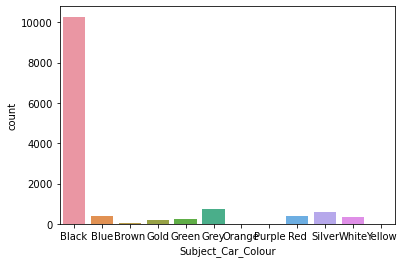

In [33]:
sns.countplot(df["Subject_Car_Colour"]);

In [34]:
# LGA_Name

df.LGA_Name.unique()

[NaN, 'Lagos', 'Ikeja', 'Badagry', 'Eti-Osa', ..., 'Hong', 'Ifako-Agege', 'Benue', 'Okpokwu', 'Ngor-Okpala']
Length: 271
Categories (270, object): [' IFAKO', 'ABULE EGBA', 'AGBARA', 'AJAO ESTATE', ..., 'Yorro', 'Zaria', 'Zaria ', 'kumbotso']

In [35]:
#tranforming the uppercases to match with the rest

df["LGA_Name"]= df["LGA_Name"].str.title()
df["LGA_Name"].unique()

array([nan, 'Lagos', 'Ikeja', 'Badagry', 'Eti-Osa', 'Victoria Island',
       'Ikoyi', 'Lagos Mainland', 'Effurun', 'Abeokuta',
       'Abuja Municipal', 'Yaba', 'Aguda', 'Surulere', 'Oshodi-Isolo',
       'Alimosho', 'Okpe, Delta State', 'Asaba', 'Ibadancentral', 'Lekki',
       'Ibeju/Lekki', 'Obanikoro', 'Agege', 'Isheri', 'Kosofe', 'Ogun',
       'Apapa', 'Ibadan South West', 'Obia/Akpor', 'Ibadan South East',
       'Sapele', 'Kaduna South', 'Ikorodu', 'Amuwo-Odofin', 'Awka',
       'Gbagada', 'Port Harcourt', 'Minna', 'Shomolu', 'Benin',
       'Lagos Island', 'Central', 'Ebute-Metta', 'Ketu', 'Uyo', 'Mushin',
       'Katagum', 'Enugu East', 'Oredo', 'Abuja', 'Festac', 'Ipaja',
       'Zaria ', 'Esan West', 'Oluyole', 'Bwari', 'Obafemi-Owode', 'Lga',
       'Orile-Iganmu', 'Egbeda', 'Ido', 'Ifako-Ijaye ', 'Ibadan North',
       'Oguta', 'Jos North', 'Ajah', 'Ondo West', 'Kaduna North', 'Warri',
       'Aniocha South', 'Owerri', 'Awka South', 'Asokoro District',
       'Ile-Oluji'

In [36]:
df["LGA_Name"].isna().sum() # inspecting for missing data

7132

In [37]:
#to replace missing values
df['LGA_Name'] = df['LGA_Name'].fillna(df['LGA_Name'].mode()[0])
df["LGA_Name"].isna().sum() # reinspecting for missing values

0

In [38]:
# State
df["State"].unique()

[NaN, 'Lagos', 'Benue', 'Eti-Osa', 'Delta', ..., 'ENUGU-SOUTH', 'Ijebu-North', 'Asari-Toru', 'Idemili-south', 'Ngor-Okpala']
Length: 114
Categories (113, object): ['ABULE-EGBA', 'AJAO-ESTATE', 'Aba-North', 'Aba-South', ..., 'Umuahia-South', 'Warri-Central', 'Warri-North', 'Warri-South']

In [39]:
#tranforming the uppercases to match with the rest

df["State"]= df["State"].str.title()
df["State"].unique()

array([nan, 'Lagos', 'Benue', 'Eti-Osa', 'Delta', 'Ogun',
       'Abuja-Municipal', 'Oshodi-Isolo', 'Ibeju-Lekki', 'Ibadan-West',
       'Obia-Akpor', 'Ibadan-East', 'Kaduna-South', 'Amuwo-Odofin',
       'Anambra', 'Rivers', 'Niger-State', 'Edo', 'Akwa-Ibom',
       'Enugu-East', 'Abuja', 'Kaduna', 'Esan-West', 'Obafemi-Owode',
       'Orile-Iganmu', 'Ifako-Ijaye', 'Ibadan-North', 'Imo', 'Jos-North',
       'Ondo-West', 'Kaduna-North', 'Aniocha-South', 'Awka-South',
       'Ile-Oluji', 'Ijebu-Ode', 'Port-Harcourt', 'Nnewi-North',
       'Aboh-Mbaise', 'Oyo', 'Akoko-West', 'Warri-Central', 'Cross-River',
       'Jos-South', 'Onitsha-North', 'Osun', 'Ajeromi-Ifelodun',
       'Kano-Municipal', 'Ife-Central', 'Ilorin-West', 'Lagelu-North',
       'Owerri-Municipal', 'Nsit-Ubium', 'Udi-Agwu', 'Essien-Udim',
       'Owerri-West', 'Ondo', 'Ogbmosho-South', 'Umuahia-South',
       'Abule-Egba', 'Enugu-North', 'Ovia-Southwest', 'Kebbi',
       'Ajegunle-State', 'Ekiti-West', 'Ogun-Waterside',

In [40]:
#filling the missing values
df["State"] =df['State'].fillna(df['State'].mode()[0])
df["State"].isna().sum() #re-inspecting for missing values

0

In [41]:
# Subject_Car_Maker
df["Subject_Car_Make"].unique()

['TOYOTA', NaN, 'REXTON', 'Lexus', 'Hyundai', ..., 'BRILLIANCE', 'Buik', 'COMMANDER', 'Bajaj', 'Datsun']
Length: 76
Categories (75, object): ['.', 'ABG', 'ACURA', 'As Attached', ..., 'Volvo', 'Wrangler Jeep', 'Yamaha', 'ZOYTE']

In [42]:
#tranforming the uppercases to match with the rest
df["Subject_Car_Make"]= df["Subject_Car_Make"].str.title()
df["Subject_Car_Make"].unique()

array(['Toyota', nan, 'Rexton', 'Lexus', 'Hyundai', 'Iveco', 'Daf',
       'Honda', 'Mercedes', 'Jincheng', 'Acura', 'Ford', 'Volkswagen',
       'Nissan', '.', 'Pontiac', 'Range Rover', 'Kia', 'Mitsubishi',
       'Scania', 'Bmw', 'Infiniti', 'Renault', 'Volvo', 'Hummer', 'Mack',
       'Grand Cherokee', 'Porsche', 'Peugeot', 'Land Rover', 'Chevrolet',
       'Mazda', 'Man', 'Jeep', 'Audi', 'Suzuki', 'Mini Cooper', 'Ka',
       'As Attached', 'Innson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler',
       'Dodge', 'Gmc', 'Land Rover.', 'Subaru', 'Gac', 'Fiat', 'Opel',
       'Astra', 'Motorcycle', 'Zoyte', 'Seat', 'Foton', 'Howo', 'Lincoln',
       'Rols Royce', 'Changan', 'Liberty', 'Abg', 'Yamaha', 'Black',
       'Tata', 'Ashok Leyland', 'Geely', 'Caddillac', 'Wrangler Jeep',
       'Raston', 'Mg', 'Brilliance', 'Buik', 'Commander', 'Bajaj',
       'Datsun'], dtype=object)

In [43]:
#filling the missing values
df["Subject_Car_Make"] =df['Subject_Car_Make'].fillna(df['Subject_Car_Make'].mode()[0])
df["Subject_Car_Make"].isna().sum() #re-inspecting for missing values

0

Re-inspectin our dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      13281 non-null  object        
 1   Policy Start Date       13281 non-null  datetime64[ns]
 2   Policy End Date         13281 non-null  datetime64[ns]
 3   Gender                  13281 non-null  category      
 4   Age                     13281 non-null  int32         
 5   First Transaction Date  13281 non-null  datetime64[ns]
 6   No_Pol                  13281 non-null  int64         
 7   Car_Category            13281 non-null  category      
 8   Subject_Car_Colour      13281 non-null  category      
 9   Subject_Car_Make        13281 non-null  object        
 10  LGA_Name                13281 non-null  object        
 11  State                   13281 non-null  object        
 12  ProductName             13281 non-null  catego

In [45]:
#checking for the number of mising values
df.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                       0
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category                 0
Subject_Car_Colour           0
Subject_Car_Make             0
LGA_Name                     0
State                        0
ProductName                  0
target                    1202
dtype: int64

In [46]:
#Creating a period column

#I created a period table to indicate the peiod of time in 
#days from when the car owners started their policies and when
#they ended it. 
# To create the period column subtracted the Policy_Start_Date column from the Policy_End_Date column ; which gives us the diffrence in days 

df['Period'] = (df['Policy Start Date'] - df['Policy End Date']).dt.days
df['Period'].astype(int)

0       -364
1       -364
2       -364
3       -364
4       -124
        ... 
13276   -364
13277   -364
13278   -364
13279   -364
13280   -364
Name: Period, Length: 13281, dtype: int32

In [47]:
df["Period"]= df["Period"].abs()
df["Period"]

0        364
1        364
2        364
3        364
4        124
        ... 
13276    364
13277    364
13278    364
13279    364
13280    364
Name: Period, Length: 13281, dtype: int64

In [48]:
#Dropping the ID column because it won't be relevant for our model prediction
df.drop('ID',axis=1, inplace = True)
df.columns

Index(['Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Period'],
      dtype='object')

In [49]:
df

,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Period
0,2010-05-14,2011-05-13,Male,34,2010-05-14,0,Saloon,Black,Toyota,Victoria Island,Lagos,Car Classic,0.0,364
1,2010-11-29,2011-11-28,Female,34,2010-11-29,0,Jeep,Grey,Toyota,Victoria Island,Lagos,Car Classic,1.0,364
2,2010-03-21,2011-03-20,Male,34,2010-03-21,0,Saloon,Red,Toyota,Victoria Island,Lagos,Car Classic,0.0,364
3,2010-08-21,2011-08-20,Male,34,2010-08-21,0,Saloon,Black,Toyota,Victoria Island,Lagos,CarSafe,0.0,364
4,2010-08-29,2010-12-31,Others,34,2010-08-29,1,Saloon,Black,Toyota,Lagos,Lagos,Muuve,1.0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13276,2010-12-05,2011-12-04,Male,59,2010-12-05,2,Jeep,Black,Toyota,Victoria Island,Lagos,Car Classic,NaN,364
13277,2010-01-14,2011-01-13,Male,34,2010-01-14,0,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic,NaN,364
13278,2010-07-26,2011-07-25,Male,34,2010-07-26,0,Truck,White,Iveco,Victoria Island,Lagos,CVTP,NaN,364
13279,2010-02-16,2011-02-15,Male,38,2010-02-16,2,Saloon,Black,Nissan,Aba North,Aba-North,Car Classic,NaN,364


# The target value data type cannot be changed because it has missing values and we cannot mess with or tamper with our target column because we will need it for machine learning, so instead we are going to change the dtype during machine learning

In [50]:
#Here is how our dataset looks after cleaning and assigning correct the data types to our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Policy Start Date       13281 non-null  datetime64[ns]
 1   Policy End Date         13281 non-null  datetime64[ns]
 2   Gender                  13281 non-null  category      
 3   Age                     13281 non-null  int32         
 4   First Transaction Date  13281 non-null  datetime64[ns]
 5   No_Pol                  13281 non-null  int64         
 6   Car_Category            13281 non-null  category      
 7   Subject_Car_Colour      13281 non-null  category      
 8   Subject_Car_Make        13281 non-null  object        
 9   LGA_Name                13281 non-null  object        
 10  State                   13281 non-null  object        
 11  ProductName             13281 non-null  category      
 12  target                  12079 non-null  float6

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


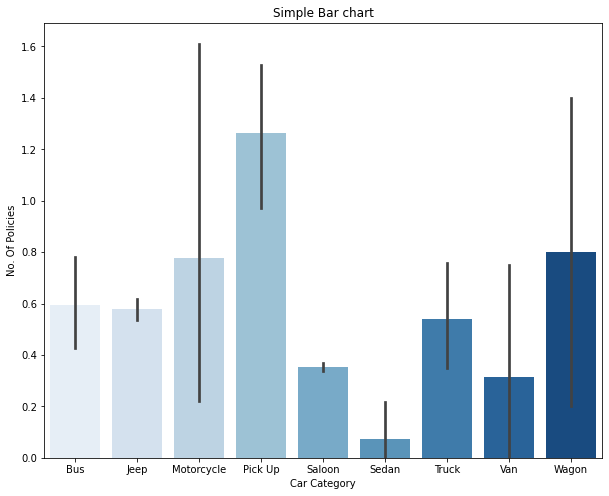

In [51]:
plt.figure(figsize = (10,8));
sns.barplot(df['Car_Category'],df['No_Pol'],palette="Blues");
plt.xlabel('Car Category');
plt.ylabel('No. Of Policies');
plt.title('Simple Bar chart');

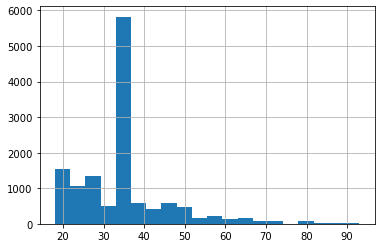

In [52]:
df.Age.hist(bins=20);

# Machine Learning

In [53]:
df.dropna(inplace=True)
df

,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Period
0,2010-05-14,2011-05-13,Male,34,2010-05-14,0,Saloon,Black,Toyota,Victoria Island,Lagos,Car Classic,0.0,364
1,2010-11-29,2011-11-28,Female,34,2010-11-29,0,Jeep,Grey,Toyota,Victoria Island,Lagos,Car Classic,1.0,364
2,2010-03-21,2011-03-20,Male,34,2010-03-21,0,Saloon,Red,Toyota,Victoria Island,Lagos,Car Classic,0.0,364
3,2010-08-21,2011-08-20,Male,34,2010-08-21,0,Saloon,Black,Toyota,Victoria Island,Lagos,CarSafe,0.0,364
4,2010-08-29,2010-12-31,Others,34,2010-08-29,1,Saloon,Black,Toyota,Lagos,Lagos,Muuve,1.0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,2010-05-25,2011-05-24,Female,34,2010-05-25,0,Saloon,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1.0,364
12075,2010-10-03,2011-10-02,Female,34,2010-10-03,0,Saloon,Black,Toyota,Victoria Island,Lagos,Car Classic,0.0,364
12076,2010-10-10,2011-10-08,Male,34,2010-10-10,0,Saloon,Black,Toyota,Victoria Island,Lagos,CarSafe,0.0,363
12077,2010-02-27,2011-02-26,Male,34,2010-02-27,2,Saloon,White,Toyota,Victoria Island,Lagos,CVTP,0.0,364


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

In [55]:
#our model can't make prediction with the date_cols, hence the need for splitting using the "getttr" keyword

In [56]:
for col in date_cols:
    for date_feature in ['year', 'month', 'day']:
        df[col+date_feature] = getattr(df[col].dt, date_feature)
df

,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,...,Period,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday,First Transaction Dateyear,First Transaction Datemonth,First Transaction Dateday
0,2010-05-14,2011-05-13,Male,34,2010-05-14,0,Saloon,Black,Toyota,Victoria Island,...,364,2010,5,14,2011,5,13,2010,5,14
1,2010-11-29,2011-11-28,Female,34,2010-11-29,0,Jeep,Grey,Toyota,Victoria Island,...,364,2010,11,29,2011,11,28,2010,11,29
2,2010-03-21,2011-03-20,Male,34,2010-03-21,0,Saloon,Red,Toyota,Victoria Island,...,364,2010,3,21,2011,3,20,2010,3,21
3,2010-08-21,2011-08-20,Male,34,2010-08-21,0,Saloon,Black,Toyota,Victoria Island,...,364,2010,8,21,2011,8,20,2010,8,21
4,2010-08-29,2010-12-31,Others,34,2010-08-29,1,Saloon,Black,Toyota,Lagos,...,124,2010,8,29,2010,12,31,2010,8,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,2010-05-25,2011-05-24,Female,34,2010-05-25,0,Saloon,Black,Range Rover,Ibeju/Lekki,...,364,2010,5,25,2011,5,24,2010,5,25
12075,2010-10-03,2011-10-02,Female,34,2010-10-03,0,Saloon,Black,Toyota,Victoria Island,...,364,2010,10,3,2011,10,2,2010,10,3
12076,2010-10-10,2011-10-08,Male,34,2010-10-10,0,Saloon,Black,Toyota,Victoria Island,...,363,2010,10,10,2011,10,8,2010,10,10
12077,2010-02-27,2011-02-26,Male,34,2010-02-27,2,Saloon,White,Toyota,Victoria Island,...,364,2010,2,27,2011,2,26,2010,2,27


In [57]:
df.columns

Index(['Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Period', 'Policy Start Dateyear',
       'Policy Start Datemonth', 'Policy Start Dateday', 'Policy End Dateyear',
       'Policy End Datemonth', 'Policy End Dateday',
       'First Transaction Dateyear', 'First Transaction Datemonth',
       'First Transaction Dateday'],
      dtype='object')

In [58]:
train_df= df.iloc[0:12078]
test_df = df.iloc[12079:]

df=train_df.copy()
df

,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,...,Period,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday,First Transaction Dateyear,First Transaction Datemonth,First Transaction Dateday
0,2010-05-14,2011-05-13,Male,34,2010-05-14,0,Saloon,Black,Toyota,Victoria Island,...,364,2010,5,14,2011,5,13,2010,5,14
1,2010-11-29,2011-11-28,Female,34,2010-11-29,0,Jeep,Grey,Toyota,Victoria Island,...,364,2010,11,29,2011,11,28,2010,11,29
2,2010-03-21,2011-03-20,Male,34,2010-03-21,0,Saloon,Red,Toyota,Victoria Island,...,364,2010,3,21,2011,3,20,2010,3,21
3,2010-08-21,2011-08-20,Male,34,2010-08-21,0,Saloon,Black,Toyota,Victoria Island,...,364,2010,8,21,2011,8,20,2010,8,21
4,2010-08-29,2010-12-31,Others,34,2010-08-29,1,Saloon,Black,Toyota,Lagos,...,124,2010,8,29,2010,12,31,2010,8,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073,2010-08-08,2011-08-07,Female,34,2010-08-08,0,Saloon,Gold,Hyundai,Lagos Island,...,364,2010,8,8,2011,8,7,2010,8,8
12074,2010-05-25,2011-05-24,Female,34,2010-05-25,0,Saloon,Black,Range Rover,Ibeju/Lekki,...,364,2010,5,25,2011,5,24,2010,5,25
12075,2010-10-03,2011-10-02,Female,34,2010-10-03,0,Saloon,Black,Toyota,Victoria Island,...,364,2010,10,3,2011,10,2,2010,10,3
12076,2010-10-10,2011-10-08,Male,34,2010-10-10,0,Saloon,Black,Toyota,Victoria Island,...,363,2010,10,10,2011,10,8,2010,10,10


In [59]:
#re-inspect our dataset for number of missing values
df.isna().sum()

Policy Start Date              0
Policy End Date                0
Gender                         0
Age                            0
First Transaction Date         0
No_Pol                         0
Car_Category                   0
Subject_Car_Colour             0
Subject_Car_Make               0
LGA_Name                       0
State                          0
ProductName                    0
target                         0
Period                         0
Policy Start Dateyear          0
Policy Start Datemonth         0
Policy Start Dateday           0
Policy End Dateyear            0
Policy End Datemonth           0
Policy End Dateday             0
First Transaction Dateyear     0
First Transaction Datemonth    0
First Transaction Dateday      0
dtype: int64

Inspecting the dependent variable for modelling

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


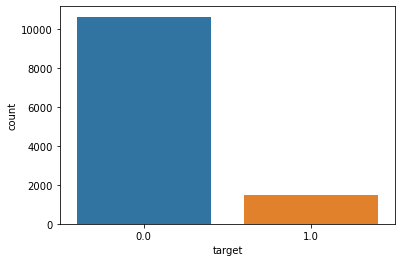

In [60]:
#graphical presentation of the dependent variable("target" col)
sns.countplot(df["target"]);

In [61]:
df["target"].value_counts()

0.0    10623
1.0     1455
Name: target, dtype: int64

From the observation above, the values in the dependent variable is imbalanced,hence the need for resampling

In [62]:
#randomly duplicate observations from the minority

df_maj = df[df['target'] == 0] 
df_min = df[df['target'] == 1]

# upsampling the miniority class
df_min_upsampled= resample(df_min,
                            replace=True,
                            n_samples=10623,
                            random_state=123)

df=pd.concat([df_maj ,df_min_upsampled])

In [63]:
#re-inspect to confirm resampled dataset
df["target"].value_counts()

0.0    10623
1.0    10623
Name: target, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


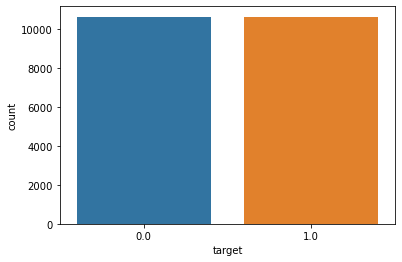

In [64]:
sns.countplot(df["target"]);

# Onehot Encoding
Encoding Categorical Data (to avoid misinterpreted correlation among the data).
This is done by creating binary vectors for categorical data

In [65]:
df.drop(date_cols,axis=1, inplace= True)
df

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Period,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday,First Transaction Dateyear,First Transaction Datemonth,First Transaction Dateday
0,Male,34,0,Saloon,Black,Toyota,Victoria Island,Lagos,Car Classic,0.0,364,2010,5,14,2011,5,13,2010,5,14
2,Male,34,0,Saloon,Red,Toyota,Victoria Island,Lagos,Car Classic,0.0,364,2010,3,21,2011,3,20,2010,3,21
3,Male,34,0,Saloon,Black,Toyota,Victoria Island,Lagos,CarSafe,0.0,364,2010,8,21,2011,8,20,2010,8,21
5,Male,34,2,Saloon,Black,Toyota,Victoria Island,Lagos,Car Classic,0.0,364,2010,10,21,2011,10,20,2010,10,21
6,Female,34,1,Saloon,Black,Toyota,Ikeja,Lagos,CVTP,0.0,364,2010,8,2,2011,8,1,2010,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,Male,46,0,Saloon,Black,Toyota,Victoria Island,Lagos,Car Classic,1.0,364,2010,10,9,2011,10,8,2010,10,9
4356,Male,26,2,Jeep,Black,Lexus,Ogudu,Benue,Car Plus,1.0,364,2010,8,31,2011,8,30,2010,8,31
9165,Male,34,2,Saloon,Grey,Toyota,Victoria Island,Lagos,Car Classic,1.0,106,2010,11,21,2011,3,7,2010,11,21
3706,Male,42,0,Saloon,Grey,Toyota,Victoria Island,Lagos,Car Classic,1.0,364,2010,3,13,2011,3,12,2010,3,13


In [66]:
for col in cat_cols:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col[:3], drop_first=True)], axis=1)
    df.drop(col,axis=1,inplace=True)
    
df

,Age,No_Pol,target,Period,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday,...,Sta_Warri-North,Sta_Warri-South,Pro_Car Classic,Pro_Car Plus,Pro_Car Vintage,Pro_CarFlex,Pro_CarSafe,Pro_Customized Motor,Pro_Motor Cycle,Pro_Muuve
0,34,0,0.0,364,2010,5,14,2011,5,13,...,0,0,1,0,0,0,0,0,0,0
2,34,0,0.0,364,2010,3,21,2011,3,20,...,0,0,1,0,0,0,0,0,0,0
3,34,0,0.0,364,2010,8,21,2011,8,20,...,0,0,0,0,0,0,1,0,0,0
5,34,2,0.0,364,2010,10,21,2011,10,20,...,0,0,1,0,0,0,0,0,0,0
6,34,1,0.0,364,2010,8,2,2011,8,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,46,0,1.0,364,2010,10,9,2011,10,8,...,0,0,1,0,0,0,0,0,0,0
4356,26,2,1.0,364,2010,8,31,2011,8,30,...,0,0,0,1,0,0,0,0,0,0
9165,34,2,1.0,106,2010,11,21,2011,3,7,...,0,0,1,0,0,0,0,0,0,0
3706,42,0,1.0,364,2010,3,13,2011,3,12,...,0,0,1,0,0,0,0,0,0,0


In [68]:
#df.drop(date_cols, axis=1)

# Splitting the dataset into Training set and Test set

In [70]:
x = df.drop(['target'], axis=1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)
#"random_state" is used to ensure that the train-test split is reproducible,so thattyou can get the same
#results everytime you run the code.
#This can be helpful for debugging or for comparing diff models on same train-test split.

In [71]:
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(16996, 481)

(4250, 481)

(16996,)

(4250,)

In [72]:
display(x_train,x_test,y_train,y_test)

,Age,No_Pol,Period,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday,First Transaction Dateyear,...,Sta_Warri-North,Sta_Warri-South,Pro_Car Classic,Pro_Car Plus,Pro_Car Vintage,Pro_CarFlex,Pro_CarSafe,Pro_Customized Motor,Pro_Motor Cycle,Pro_Muuve
9300,36,1,273,2010,11,6,2011,8,6,2010,...,0,0,1,0,0,0,0,0,0,0
325,41,0,364,2010,6,11,2011,6,10,2010,...,0,0,1,0,0,0,0,0,0,0
11048,34,0,364,2010,4,26,2011,4,25,2010,...,0,0,1,0,0,0,0,0,0,0
9431,42,0,364,2010,2,20,2011,2,19,2010,...,0,0,1,0,0,0,0,0,0,0
2616,29,0,364,2010,11,5,2011,11,4,2010,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8822,18,0,364,2010,5,14,2011,5,13,2010,...,0,0,0,0,0,0,1,0,0,0
3061,33,0,364,2010,1,23,2011,1,22,2010,...,0,0,1,0,0,0,0,0,0,0
10987,46,0,233,2010,11,20,2011,7,11,2010,...,0,0,1,0,0,0,0,0,0,0
11668,34,0,364,2010,7,9,2011,7,8,2010,...,0,0,1,0,0,0,0,0,0,0


,Age,No_Pol,Period,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday,First Transaction Dateyear,...,Sta_Warri-North,Sta_Warri-South,Pro_Car Classic,Pro_Car Plus,Pro_Car Vintage,Pro_CarFlex,Pro_CarSafe,Pro_Customized Motor,Pro_Motor Cycle,Pro_Muuve
3853,34,0,364,2010,4,25,2011,4,24,2010,...,0,0,1,0,0,0,0,0,0,0
11662,65,2,364,2010,7,22,2011,7,21,2010,...,0,0,0,1,0,0,0,0,0,0
5044,35,0,364,2010,7,19,2011,7,18,2010,...,0,0,0,0,0,0,0,1,0,0
8246,34,2,364,2010,4,26,2011,4,25,2010,...,0,0,0,0,0,0,0,0,0,0
3426,34,2,181,2010,12,13,2011,6,12,2010,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,34,0,364,2010,3,27,2011,3,26,2010,...,0,0,0,1,0,0,0,0,0,0
1985,78,0,364,2010,11,8,2011,11,7,2010,...,0,0,0,0,0,0,1,0,0,0
11530,34,2,363,2010,6,18,2011,6,16,2010,...,0,0,0,0,0,0,1,0,0,0
1670,19,0,364,2010,5,31,2011,5,30,2010,...,0,0,0,0,0,0,1,0,0,0


9300     1.0
325      1.0
11048    0.0
9431     1.0
2616     0.0
        ... 
8822     0.0
3061     1.0
10987    1.0
11668    1.0
10364    1.0
Name: target, Length: 16996, dtype: float64

3853     0.0
11662    1.0
5044     0.0
8246     1.0
3426     1.0
        ... 
4866     1.0
1985     0.0
11530    0.0
1670     0.0
2997     1.0
Name: target, Length: 4250, dtype: float64

In [73]:
from sklearn.neighbors import KNeighborsClassifier
#The KNeighborsClassifier function in scikit-learn allows you to specify the value of K 
#(i.e. the number of nearest neighbors to consider), as well as other parameters such as the distance metric to use.

In [82]:
# 2. Create an instance of the estimator
KNN = KNeighborsClassifier(n_neighbors=4)

In [83]:
# 3. Use the training data to train the estimator

KNN.fit(x_train, y_train)

#the algorithm works by fitting a model to the training data, where the inputs are the features 
#(i.e. the independent variables) and the outputs are the target classes (i.e. the dependent variable).
#Then, when presented with a new set of input features, the algorithm predicts the target class by finding
#the K closest points in the training set and classifying the new point based on the most common class among 
#its K nearest neighbors.

KNeighborsClassifier(n_neighbors=4)

In [84]:
# 4. Evaluate the model
y_pred= KNN.predict(x_test)
#The predict() method of the KNeighborsClassifier class is used to generate predictions for a set of test input data X_test.
#The "y_pred" is a numpy array that contains the predicted class labels for the test set of input data, based on the model KNN.

In [85]:
#Confusion matrix
#A confusion matrix is a table that is used to evaluate the performance of a classification algorithm by comparing the
#actual labels of a dataset with the predicted labels produced by the algorithm.
from sklearn.metrics import classification_report,confusion_matrix 


print(confusion_matrix(y_pred,y_test))
print("\nClassification Report")
print(classification_report(y_test, y_pred))

[[1677   89]
 [ 409 2075]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87      2086
         1.0       0.84      0.96      0.89      2164

    accuracy                           0.88      4250
   macro avg       0.89      0.88      0.88      4250
weighted avg       0.89      0.88      0.88      4250



In [90]:
error_rate = []

for i in range(1,40):
    
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    pred_i = KNN.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))